Age and Coffee Consumption:

Analyze the correlation between age and the number of cups of coffee consumed per day.
Determine if there are significant differences in coffee drinking habits among different age groups.
Gender and Coffee Preferences:

Compare coffee consumption patterns between different genders.
Investigate if certain types of coffee drinks or brewing methods are more popular among specific genders.
Education Level and Coffee Knowledge:

Explore the relationship between education level and self-rated coffee expertise.
Determine if education level influences preferences for certain coffee roasts or brewing methods.
Employment Status and Coffee Consumption:

Analyze how employment status (working from home vs. in-person) affects coffee consumption habits and preferences.

In [37]:
import pandas as pd

In [38]:
coffee_path = r'C:\Users\44771\Documents\Repo\Data_projects_24\coffee_survey\coffee_data.csv'
coffee_df = pd.read_csv(coffee_path)
all_col = coffee_df.columns.to_list()

## Find the relationship between age group and number of coffees typically drunk per day on average.

In [39]:
coffee_df['What is your age?'].unique()
# Find all unique values for this column and datatype.

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '55-64 years old', nan, '<18 years old', '>65 years old',
       '45-54 years old'], dtype=object)

In [40]:
age_category_order = [
    '<18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '>65 years old'
]

# Specify an ordering of the age category from youngest to oldest and convert into categorical data type.

coffee_df['What is your age?'] = pd.Categorical(coffee_df['What is your age?'], categories=age_category_order, ordered=True)

In [41]:
# Repeat same process for number of cups of coffee drank per day.
coffee_df['How many cups of coffee do you typically drink per day?'].unique()

array([nan, 'Less than 1', '2', '1', '3', 'More than 4', '4'],
      dtype=object)

In [42]:
coffee_df['How many cups of coffee do you typically drink per day?'].unique()
no_coffees_order = [
    'Less than 1',
    '1',
    '2',
    '3',
    '4',
    'More than 4'
]

coffee_df['How many cups of coffee do you typically drink per day?'] = pd.Categorical(coffee_df['How many cups of coffee do you typically drink per day?'], categories=no_coffees_order, ordered=True)

In [43]:
# Produce new dataframe with just these 2 columns.

age_no_coffee = coffee_df[[
    'What is your age?',
    'How many cups of coffee do you typically drink per day?'
]].sort_values(['What is your age?','How many cups of coffee do you typically drink per day?'])

age_no_coffee.dropna(inplace=True)

In [44]:
# Find the % of people each age category that drink a specific number of cups per day.
age_no_coffee_pct = round(age_no_coffee.groupby('What is your age?').value_counts(normalize=True)*100,1)
age_no_coffee_pct

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\4207163180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_coffee_pct = round(age_no_coffee.groupby('What is your age?').value_counts(normalize=True)*100,1)


What is your age?  How many cups of coffee do you typically drink per day?
<18 years old      2                                                          36.8
                   1                                                          31.6
                   Less than 1                                                26.3
                   3                                                           5.3
                   4                                                           0.0
                   More than 4                                                 0.0
18-24 years old    1                                                          37.1
                   2                                                          35.8
                   Less than 1                                                15.7
                   3                                                           7.4
                   4                                                           2.2
            

In [45]:
# Unstacking the multiIndex df into a regular dataframe so that we can plot it using matplotlib.
df_age_no_coffee_pct = age_no_coffee_pct.unstack()

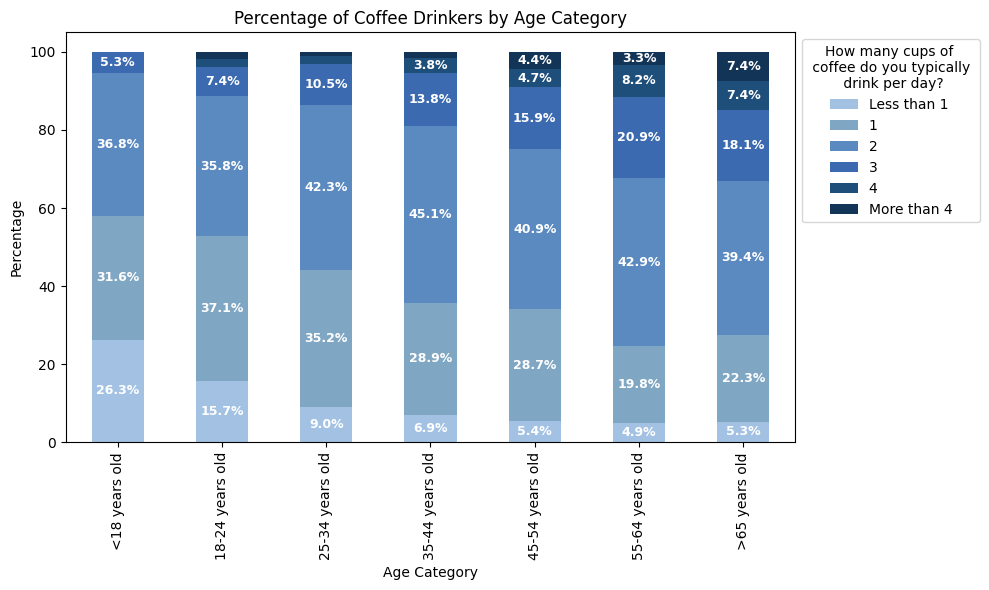

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bars
df_age_no_coffee_pct.plot(kind='bar', stacked=True, ax=ax, color=['#a3c2e3', '#7fa6c2', '#5a8abf', '#3b6ab0', '#1e4e7a', '#123456'])
# Adding labels and title
ax.set_xlabel('Age Category')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Coffee Drinkers by Age Category')
legend = ax.legend(title='How many cups of \n coffee do you typically \n drink per day?', bbox_to_anchor=(1, 1), loc='upper left')
legend.get_title().set_ha('center')

for i, (age, row) in enumerate(df_age_no_coffee_pct.iterrows()):
    bottom = 0
    for col in df_age_no_coffee_pct.columns:
        height = row[col]
        if height > 3:
            ax.text(i, bottom + height / 2, f'{height}%', 
                    ha='center', va='center', fontsize=9, color='white', 
                    weight='bold')
            bottom += height

# Display the plot
plt.tight_layout()
plt.show()

Across all age categories, the majority of individuals consume approximately 2-3 cups of coffee per day. Notably, the data indicates a higher proportion of individuals in older age groups who report drinking 3 or more cups daily compared to their younger counterparts. It is noteworthy that the under-18 age group exhibits the highest proportion of individuals who report drinking zero cups of coffee per day. This finding aligns with expectations, given the generally lower coffee consumption rates observed in younger populations.

In [47]:
age_no_coffee['How many cups of coffee do you typically drink per day?'].unique()

['Less than 1', '1', '2', '3', '4', 'More than 4']
Categories (6, object): ['Less than 1' < '1' < '2' < '3' < '4' < 'More than 4']

In [48]:
cups_mapping = {
    'Less than 1': 0.5,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'More than 4': 5
}

age_no_coffee['number of cups numerical'] = age_no_coffee['How many cups of coffee do you typically drink per day?'].map(cups_mapping)
age_no_coffee['number of cups numerical'] = age_no_coffee['number of cups numerical'].astype(float)

In [49]:
avg_cups_per_age = round(age_no_coffee.groupby('What is your age?')['number of cups numerical'].mean(),1)

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\3910753134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cups_per_age = round(age_no_coffee.groupby('What is your age?')['number of cups numerical'].mean(),1)


In [50]:
avg_cups_per_age

What is your age?
<18 years old      1.3
18-24 years old    1.6
25-34 years old    1.7
35-44 years old    1.9
45-54 years old    2.0
55-64 years old    2.2
>65 years old      2.2
Name: number of cups numerical, dtype: float64

In [51]:
# Right now the index is the age group, we want to turn this back into a regular column so we can have a regular df to plot.
avg_cups_per_age_df = avg_cups_per_age.reset_index()
avg_cups_per_age_df

,What is your age?,number of cups numerical
0,<18 years old,1.3
1,18-24 years old,1.6
2,25-34 years old,1.7
3,35-44 years old,1.9
4,45-54 years old,2.0
5,55-64 years old,2.2
6,>65 years old,2.2


The average values indicate that there is a positive correlation between the age and the average number of coffee consumed per day.

## Finding out the most popular places for people to typically drink coffee

In [130]:
def reformat_mc_q(prefix_to_remove: str, var_name: str, list_of_cols: list, dataframe):
    '''
    This function will take a subset of columns from the dataset (the submission ID and data from a multiple choice question).
    It cleans this subset of data by dropping rows containing NULL values and removing the unnecessary prefixes and brackets in the columns.
    It then melts the dataset so we go from wide format to long-format.

    Parameters:
    prefix_to_remove (str) : The prefix to remove from the column names.
    var_name (str) : The name to assign to the variable column created during the melting process.
    list_of_cols (list) : A list of column names to include in the subset of the DataFrame. This should include the 'Submission ID' and the columns representing the multiple choice questions.
    dataframe (pandas dataframe) : The original DataFrame containing the data to be processed.

    Returns:
    final_df (pandas dataframe): A DataFrame with two columns- 'Submission ID' and the options each user selected in the multiple choice question.

    '''
    df = dataframe[list_of_cols].dropna()
    df.columns = df.columns.str.replace(prefix_to_remove, '', regex=False)
    df.columns = df.columns.str.replace(r'\(|\)', '', regex=True).str.strip()
    df_melt = df.melt(id_vars='Submission ID',var_name=var_name)
    final_df = df_melt[df_melt['value']==True].drop(columns='value')
    return final_df

In [140]:
where_q = ['Submission ID',
    'Where do you typically drink coffee? (At home)',
    'Where do you typically drink coffee? (At the office)',
    'Where do you typically drink coffee? (On the go)',
    'Where do you typically drink coffee? (At a cafe)',
    'Where do you typically drink coffee? (None of these)']

place_drink_coffee = reformat_mc_q('Where do you typically drink coffee?',
                                        'Where do you typically drink coffee?',
                                        where_q,
                                        coffee_df)

In [141]:
place_pct = round(place_drink_coffee['Where do you typically drink coffee?'].value_counts(normalize=True)*100,1).reset_index()
place_pct

,Where do you typically drink coffee?,proportion
0,At home,52.2
1,At the office,20.5
2,At a cafe,16.8
3,On the go,10.1
4,None of these,0.5


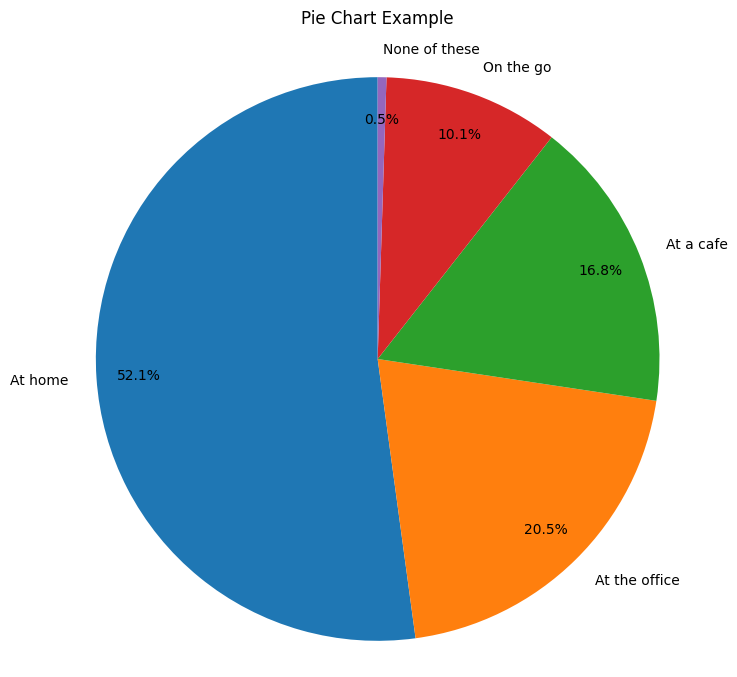

In [142]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(place_pct['proportion'], 
       labels=place_pct['Where do you typically drink coffee?'], 
       autopct='%1.1f%%', 
       startangle=90,
       pctdistance=0.85,  # Distance of the percentage labels from the center
        labeldistance=1.1)  # Distance of the category labels from the center

# Adding title

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

ax.set_title('Pie Chart Example', pad = 20)

# Display the plot
plt.show()

The pie chart indicates that more than half of the survey respondents drink coffee at home. Around 20% drink coffee in the office. The least popular choice for drinking coffee is on the go (just 10.1%).

## Finding the relationship between age and where people generally drink coffee

In [59]:
coffee_df_age = coffee_df[['Submission ID', 'What is your age?']]

In [144]:
place_drink_coffee_age = place_drink_coffee.merge(coffee_df_age,on='Submission ID')

In [147]:
place_drink_coffee_age.sort_values('Submission ID')

,Submission ID,Where do you typically drink coffee?,What is your age?
3384,0E11K6,At home,>65 years old
3390,0E1D5Z,At home,25-34 years old
4976,0E1D5Z,At the office,25-34 years old
3427,0E1qKB,At home,25-34 years old
3358,0E1vgN,At home,45-54 years old
...,...,...,...
6722,zKWjyE,At a cafe,25-34 years old
2947,zKWxaE,At home,55-64 years old
3080,zKWy91,At home,25-34 years old
4842,zKWy91,At the office,25-34 years old


In [148]:
place_age_pct = round(place_drink_coffee_age.groupby('What is your age?')['Where do you typically drink coffee?'].value_counts(normalize=True)*100,1)

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\2484322222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_age_pct = round(place_drink_coffee_age.groupby('What is your age?')['Where do you typically drink coffee?'].value_counts(normalize=True)*100,1)


In [149]:
place_age_pct_df = place_age_pct.unstack()
place_age_pct_df

Where do you typically drink coffee?,At a cafe,At home,At the office,None of these,On the go
What is your age?,,,,,
<18 years old,20.0,50.0,10.0,0.0,20.0
18-24 years old,22.4,47.5,18.6,1.0,10.6
25-34 years old,18.0,49.8,21.4,0.6,10.2
35-44 years old,15.0,53.1,21.1,0.2,10.6
45-54 years old,10.9,62.5,17.3,0.2,9.1
55-64 years old,5.8,66.9,20.4,0.0,6.9
>65 years old,8.8,72.6,11.5,1.8,5.3


<Axes: xlabel='Where do you typically drink coffee?', ylabel='What is your age?'>

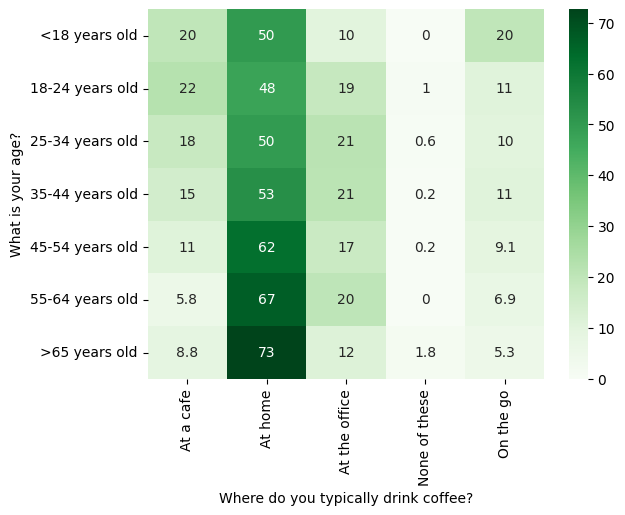

In [150]:
import seaborn as sns

sns.heatmap(place_age_pct_df, annot=True, cmap='Greens')


In [65]:
age_place_pct = round(place_drink_coffee_age.groupby('Where do you typically drink coffee?')['What is your age?'].value_counts(normalize=True)*100,1)
age_place_pct_df = age_place_pct.unstack()

In [151]:
how_q = [
    'Submission ID',
    'How do you brew coffee at home? (Pour over)',
    'How do you brew coffee at home? (French press)',
    'How do you brew coffee at home? (Espresso)',
    'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
    'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
    'How do you brew coffee at home? (Instant coffee)',
    'How do you brew coffee at home? (Bean-to-cup machine)',
    'How do you brew coffee at home? (Cold brew)',
    'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
    'How do you brew coffee at home? (Other)',
]

how_brew = reformat_mc_q('How do you brew coffee at home?',
                        'How do you brew coffee at home?',
                        how_q,
                        coffee_df)

how_brew

,Submission ID,How do you brew coffee at home?
3,QD27Q8,Pour over
5,V0Gaxg,Pour over
6,7WWB4A,Pour over
8,Zd694B,Pour over
9,QA5JYA,Pour over
...,...,...
36585,oAxPWX,Other
36598,1rOvMQ,Other
36599,Rz2JQv,Other
36607,g5ggRM,Other


In [152]:
how_overall_pct = round(how_brew['How do you brew coffee at home?'].value_counts(normalize=True)*100,1).reset_index()
how_overall_pct

,How do you brew coffee at home?,proportion
0,Pour over,32.1
1,Espresso,21.2
2,French press,10.3
3,Other,9.5
4,Coffee brewing machine e.g. Mr. Coffee,9.3
5,Cold brew,7.3
6,Pod/capsule machine e.g. Keurig/Nespresso,4.7
7,Coffee extract e.g. Cometeer,2.6
8,Instant coffee,1.8
9,Bean-to-cup machine,1.2


This breakdown indicates that 'Pour over', 'Espresso' and 'French press' are the most popular methods for brewing coffee at home. Whilst 'coffee extract', 'instant coffee' and 'Bean-to-cup machine' are the least popular.

## Analysing the relationship between age and how people brew their coffee at home.

In [154]:
how_age_df = coffee_df_age.merge(how_brew, on='Submission ID')
how_age_df.sort_values('Submission ID')

,Submission ID,What is your age?,How do you brew coffee at home?
6648,0E11K6,>65 years old,Coffee brewing machine e.g. Mr. Coffee
6663,0E1D5Z,25-34 years old,Pour over
6734,0E1qKB,25-34 years old,Pour over
6598,0E1vgN,45-54 years old,Pod/capsule machine e.g. Keurig/Nespresso
6935,0EDlP0,35-44 years old,Espresso
...,...,...,...
7017,zKdykZ,35-44 years old,Pour over
7018,zKdykZ,35-44 years old,French press
7019,zKdykZ,35-44 years old,Espresso
7020,zKdykZ,35-44 years old,Coffee brewing machine e.g. Mr. Coffee


In [155]:
how_age_pct = round(how_age_df.groupby(['What is your age?'])['How do you brew coffee at home?'].value_counts(normalize=True)*100,1)
how_age_pct = how_age_pct.unstack()

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\2635729017.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  how_age_pct = round(how_age_df.groupby(['What is your age?'])['How do you brew coffee at home?'].value_counts(normalize=True)*100,1)


In [156]:
how_age_pct

How do you brew coffee at home?,Bean-to-cup machine,Coffee brewing machine e.g. Mr. Coffee,Coffee extract e.g. Cometeer,Cold brew,Espresso,French press,Instant coffee,Other,Pod/capsule machine e.g. Keurig/Nespresso,Pour over
What is your age?,,,,,,,,,,
<18 years old,2.6,10.3,0.0,12.8,7.7,7.7,5.1,2.6,10.3,41.0
18-24 years old,0.8,8.2,0.9,7.2,19.5,11.4,2.4,11.2,6.7,31.7
25-34 years old,0.8,7.8,2.6,8.0,22.4,9.9,1.9,9.4,3.4,34.0
35-44 years old,1.4,9.5,3.3,7.5,22.0,11.1,1.4,8.5,4.0,31.3
45-54 years old,2.6,13.3,4.3,5.4,18.9,9.2,1.5,11.6,5.8,27.5
55-64 years old,2.2,18.9,1.0,3.2,16.0,9.9,2.6,9.9,12.2,24.0
>65 years old,2.9,13.6,2.9,5.0,16.4,10.7,0.7,7.9,13.6,26.4


<Axes: xlabel='How do you brew coffee at home?', ylabel='What is your age?'>

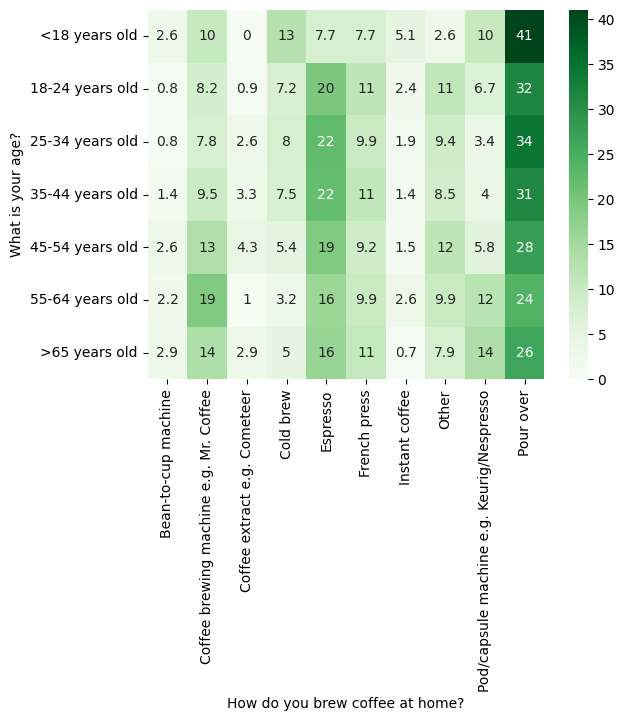

In [158]:
sns.heatmap(how_age_pct, annot=True, cmap='Greens')

Across all age categories, the most popular method for brewing coffee was 'pour over'. A specific insight to consider would be- 'coffee brewing machines tends' to have a slightly significant popularity (19%) amongst the 55-64 years old age group. Espresso is indicated to have a higher preference for participants aged 25-44 (22%). Cold brew is shown to be much higher in preference amongst the <18 age group compared to other age groups (13%).

In [159]:
where_q = [
    'Submission ID',
    'On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))',
    'On the go, where do you typically purchase coffee? (Local cafe)',
    'On the go, where do you typically purchase coffee? (Drive-thru)',
    'On the go, where do you typically purchase coffee? (Specialty coffee shop)',
    'On the go, where do you typically purchase coffee? (Deli or supermarket)',
    'On the go, where do you typically purchase coffee? (Other)',
]

where = reformat_mc_q('On the go, where do you typically purchase coffee?','On the go, where do you typically purchase coffee?',where_q,coffee_df)
where

,Submission ID,"On the go, where do you typically purchase coffee?"
0,V0Gaxg,"National chain e.g. Starbucks, Dunkin"
2,QA5JYA,"National chain e.g. Starbucks, Dunkin"
4,1r2YJQ,"National chain e.g. Starbucks, Dunkin"
8,BGbJzQ,"National chain e.g. Starbucks, Dunkin"
13,OABqQp,"National chain e.g. Starbucks, Dunkin"
...,...,...
4242,dYQjpN,Other
4243,eB92Gx,Other
4282,vNE0Dd,Other
4303,NAb78l,Other


In [164]:
where_pct = round(where['On the go, where do you typically purchase coffee?'].value_counts(normalize=True)*100,1).reset_index()
where_pct

,"On the go, where do you typically purchase coffee?",proportion
0,Specialty coffee shop,32.8
1,Local cafe,29.3
2,"National chain e.g. Starbucks, Dunkin",24.6
3,Drive-thru,7.1
4,Deli or supermarket,3.7
5,Other,2.5


In [166]:
where_age_df = where.merge(coffee_df_age,on='Submission ID')
where_age_df

,Submission ID,"On the go, where do you typically purchase coffee?",What is your age?
0,V0Gaxg,"National chain e.g. Starbucks, Dunkin",18-24 years old
1,QA5JYA,"National chain e.g. Starbucks, Dunkin",25-34 years old
2,1r2YJQ,"National chain e.g. Starbucks, Dunkin",25-34 years old
3,BGbJzQ,"National chain e.g. Starbucks, Dunkin",35-44 years old
4,OABqQp,"National chain e.g. Starbucks, Dunkin",35-44 years old
...,...,...,...
1332,dYQjpN,Other,35-44 years old
1333,eB92Gx,Other,18-24 years old
1334,vNE0Dd,Other,35-44 years old
1335,NAb78l,Other,25-34 years old


In [172]:
age_where_pct = round(where_age_df.groupby('What is your age?')['On the go, where do you typically purchase coffee?'].value_counts(normalize=True)*100,1).unstack()

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\1636904341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_where_pct = round(where_age_df.groupby('What is your age?')['On the go, where do you typically purchase coffee?'].value_counts(normalize=True)*100,1).unstack()


In [173]:
age_where_pct

"On the go, where do you typically purchase coffee?",Deli or supermarket,Drive-thru,Local cafe,"National chain e.g. Starbucks, Dunkin",Other,Specialty coffee shop
What is your age?,,,,,,
<18 years old,0.0,7.1,28.6,28.6,0.0,35.7
18-24 years old,4.9,8.8,31.3,23.6,3.3,28.0
25-34 years old,3.6,6.5,30.8,23.0,2.6,33.4
35-44 years old,3.0,6.7,26.8,25.9,2.1,35.4
45-54 years old,5.1,6.4,26.9,29.5,2.6,29.5
55-64 years old,2.9,17.6,14.7,35.3,2.9,26.5
>65 years old,0.0,0.0,37.5,37.5,0.0,25.0


<Axes: xlabel='On the go, where do you typically purchase coffee?', ylabel='What is your age?'>

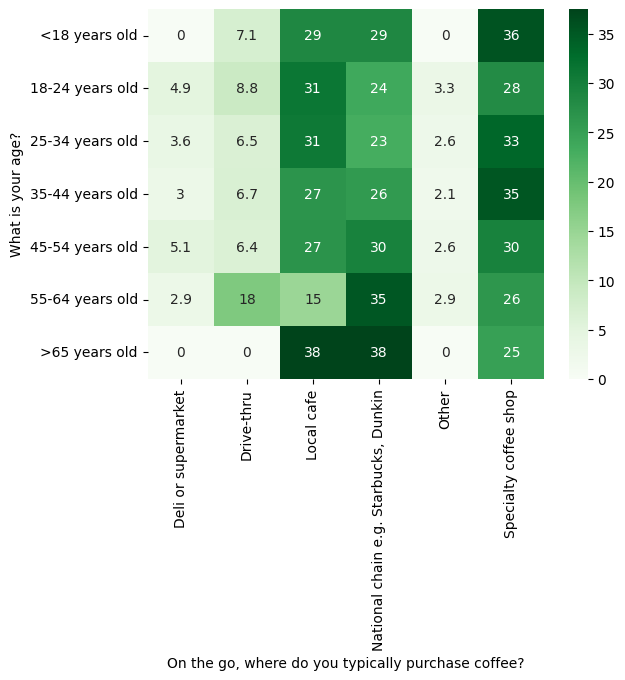

In [174]:
sns.heatmap(age_where_pct, annot=True, cmap='Greens')

On the go, speciality coffee shop, national chain and local cafe are shown to be the most popular choices across most age groups. Compared to other age groups, 55-64 age group is shown to have a have a significantly higher preference for ordering from Drive-thru compared to the other age groups.

In [179]:
coffee_df_age['What is your age?'].value_counts().reset_index()

,What is your age?,count
0,25-34 years old,1986
1,35-44 years old,960
2,18-24 years old,461
3,45-54 years old,302
4,55-64 years old,187
5,>65 years old,95
6,<18 years old,20
